In [56]:
import numpy as np 
import matplotlib.pyplot as plt

In [60]:
# a simple experiment for edges from the same triangle 
# set the covariance matrix where each coordinate corresponds to an edge 

cov = np.ones((3, 3))
cov += np.identity(3)
mean = np.zeros(3)

In [61]:
num_samp = 10000
sample = np.random.multivariate_normal(mean, cov, num_samp)

In [67]:
# conditioned on two of them being larger than a certain threshold, 
# print probability of the remaining edge larger than a threshold. 
cond = []
norm = []
for t in [0, 1,2, 3, 4]:
    print('current thresh is ' + str(t))
    thresh = sample[:, :2] > t
    conditioned = sample[:, -1][thresh[:, 0] * thresh[:, 1]]
    cond.append(np.sum(conditioned >= t)/len(conditioned))
    norm.append(np.sum(sample[:, -1] >= t)/10000)
    print('conditioned prob', str(np.sum(conditioned >= t)/len(conditioned)))
    print('total prob', str(np.sum(sample[:, -1] >= t)/10000))

current thresh is 0
conditioned prob 0.7512645046117227
total prob 0.5011
current thresh is 1
conditioned prob 0.6106194690265486
total prob 0.2382
current thresh is 2
conditioned prob 0.497737556561086
total prob 0.0811
current thresh is 3
conditioned prob 0.32142857142857145
total prob 0.0185
current thresh is 4
conditioned prob 0.3333333333333333
total prob 0.0028


In [70]:
print(np.sqrt(np.log(num_samp)))

3.034854258770293


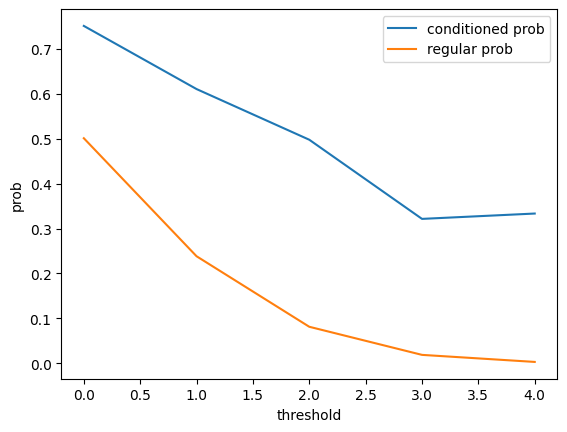

In [68]:
plt.plot(cond, label = 'conditioned prob')
plt.plot(norm, label = 'regular prob')
plt.ylabel('prob')
plt.xlabel('threshold')
leg = plt.legend(loc='upper right')